<a href="https://colab.research.google.com/github/Rushabhbhagat08/InternSavy/blob/main/Task1%3A%20Customer_Segmentation_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>**Project Name**</u> :**Customer Segmentation Analysis With Python**

###**Problem Statments :**

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# **GitHub Link -**https://github.com/Rushabhbhagat08/InternSavy/blob/main/Customer%20Segmentation%20analysis%20using%20Python/Task3%3A%20Customer_Segmentation_Analysis_with_Python.ipynb

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# import some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

### Dataset Loading

In [ ]:
# import dataset from drive
customer_data=pd.read_csv('/content/drive/MyDrive/InternSavy/Customer segementation/Mall_Customers.csv')

### Dataset First View

In [ ]:
# first view in the dataset
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# last five rows of the dataset
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


### Dataset Rows & Columns count

In [ ]:
# show the shape of the dataset
rows=customer_data.shape[0]
column=customer_data.shape[1]
print(f"The total {rows} Rows and {column} Columns in the dataset")

The total 200 Rows and 5 Columns in the dataset


### Dataset Information

In [ ]:
# see the information of the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###Missing Values/Null Values

In [ ]:
#find the nul values in the dataset
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# describe the dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# count unique customer id
customer_data['CustomerID'].value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64

In [ ]:
# Dataset Columns
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

###Variables Description

1. Customer ID : A unique value of each customers
2. Gender : gender of the customers
3. Age : Age of the customers.
4. Annual Income : Individual annual income of each customer
5. Spending Score : Total spending in each customer.


## **3. Data Vizualization**

### finding Outliers From The dataset

<Axes: >

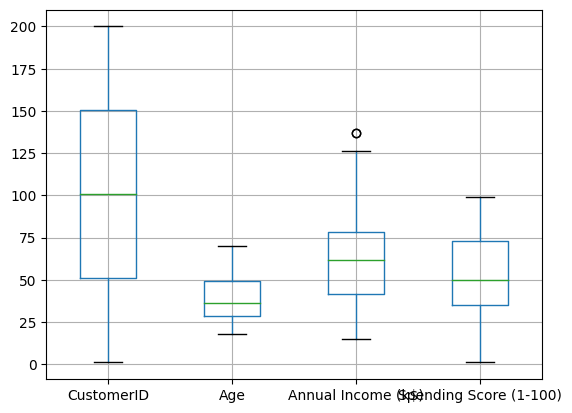

In [ ]:
# plot the boxplot to see the outliers
customer_data.boxplot()

There are some outliers in SepalWidthCm columns so we try to remove
that outliers

In [ ]:
# droping serial no. column from the dataset not required for the prediction
data=customer_data.copy()
# data.drop(['Gender'],axis=1,inplace=True)

In [ ]:
# Calculate Quartile Of each feature
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [ ]:
#identity the outliers from the dataset
df_out=data[((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
df_out.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


Now, see the above chart Id number 199 and 200 are above the range of 125  in "Annual Income (k$)"	 so in our dataset 2 outliers, that a reason we remove the outliers from the dataset.

In [ ]:
# removing Outliers from the data
df_out=data[~((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
customer_data=df_out.copy()
print(customer_data.shape)

(198, 5)


<Axes: >

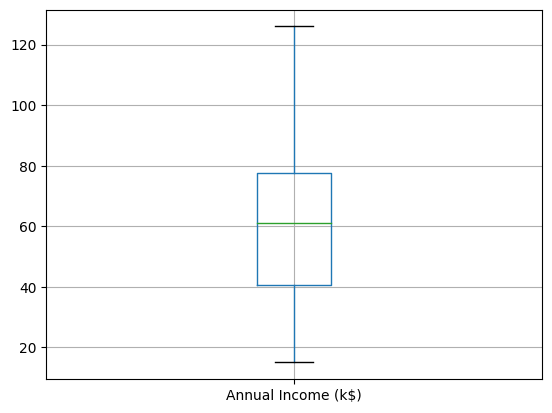

In [ ]:
# plot the boxplot
customer_data.boxplot(column=['Annual Income (k$)'])

So, we have to remove all outliers from 'Annual Income (k$)' column. and finally we remove all the outliers fro the dataset.

##**4. Expolatory Data Analysis(EDA)**

###1.Gender Distributions

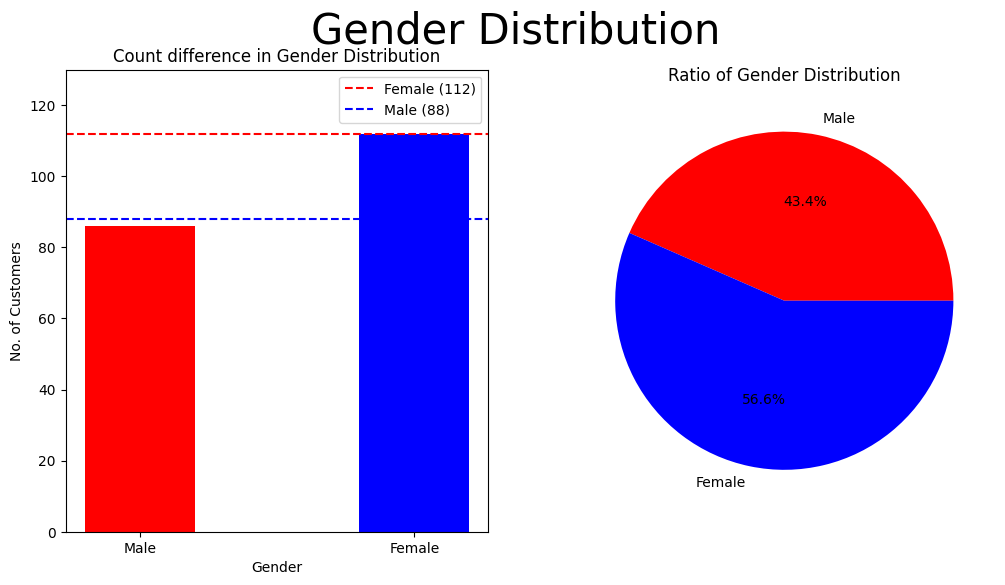

In [ ]:
# plot the pie chart and bar graph for gender

labels=customer_data['Gender'].unique()
values=customer_data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(12,6))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['red','Blue'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='red', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='Blue', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['red','Blue'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

In the above graph show the Gender wise distribution that is Male And Female. The most of the **Female** customers are visiting the mall as compare to the **Male**. we have to see that ***56.6% female** customers and **43.4% male** customers are visiting a mall.

##2. Spending score by Gender

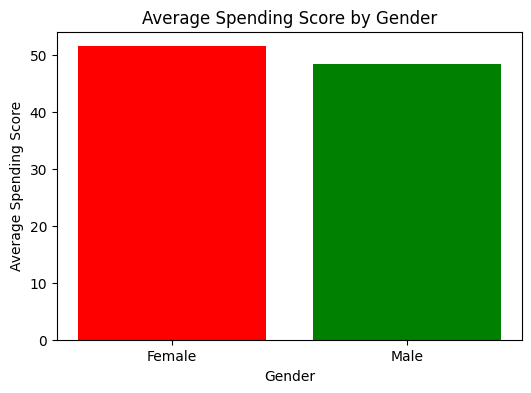

In [ ]:
# Calculate the mean spending score for each gender
mean_scores = customer_data.groupby('Gender')['Spending Score (1-100)'].mean()

# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(mean_scores.index,mean_scores.values,color=['red','green'])
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.show()

This graph show the Average spending score by Gender so The **Female** customers are more spending score as compare to male.

##3. Age Distributions

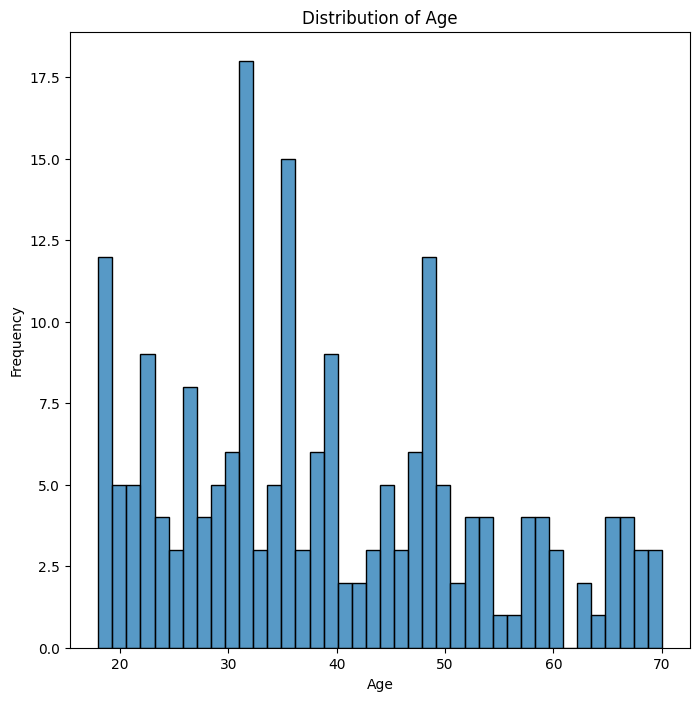

In [ ]:
# Age histogram
plt.figure(figsize=(8, 8))
sns.histplot(data=customer_data, x='Age', bins=40)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

This graph show the age distribution of the age the most of the customer are the **30-40** age which is most of the time to visiting a mall.

### 4. Annual Income by Age

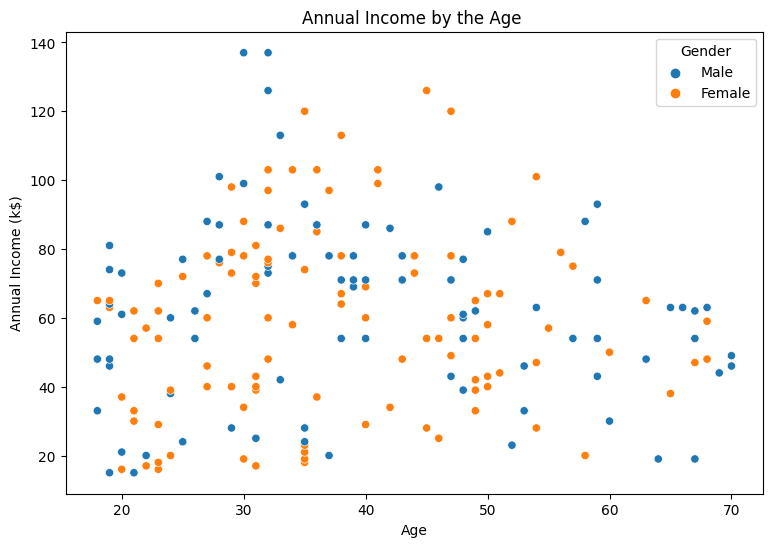

In [ ]:
# plot Scatter Plot
plt.figure(figsize=(9,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Annual Income by the Age ')
plt.show()

This is a scatter plot which is show the annual income in given customers age. the most of the Annual income are spending the mall between **30-40**.  But the most of the Annual Income in **Male** customer which is age group is **almost 33 years.**

#**5. Conclusion**

1. We are find and remove the two outliers from the dataset.
2. The ratio of male customers is 43.4%  and the ratio of female customer is 56.6%.
3. Female customers are more Spending score as compare to Male.
4. Most of the annual income is between 30-40 age group and Most of the Annual income is Male Customer.

### ***Hurrah! You have successfully completed Customer Segmentation Analysis  Project !!!***